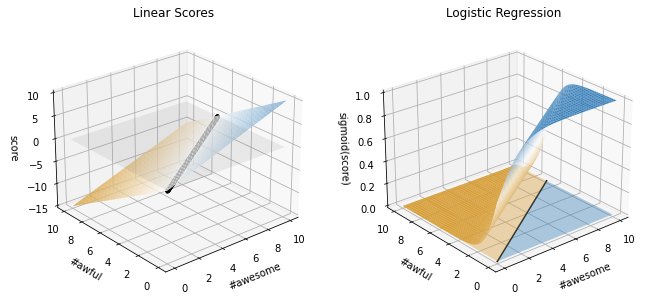

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Bunch of imports to get 3D plots
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Make our color scheme match our drawings from earlier
w = (0, 1, -1.5)

# Set up global plots
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom',
    [(0, '#D89F39'),
     (0.5, '#FFFFFF'),
     (1, '#3A81BA')], N=126)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
fig.tight_layout(pad=6.0)


def plot_score_function(ax):
    # Set up function and evalautes

    def z_function(x, y, w):
        return w[0] + w[1] * x + w[2] * y

    x = np.linspace(0, 10, 500)
    y = np.linspace(0, 10, 500)

    X, Y = np.meshgrid(x, y)
    Z = z_function(X, Y, w)

    # Make 3d plot
    ax.plot_surface(X, Y, Z, cmap=cmap, vmin=-15, vmax=15)
    ax.set_xlabel('#awesome')
    ax.set_ylabel('#awful')
    ax.set_zlabel('score')
    ax.view_init(25, 230)

    # Draw decision boundary
    ys = (-w[0] - w[1] * x) / w[2]
    ax.plot(x, ys, 0, '.', c='black')
    ax.plot_surface(X, Y, np.zeros(Z.shape), color='gray', alpha=0.1)

    ax.set_title("Linear Scores")


def plot_logistic_scores(ax):
    def z_function(x, y):
      return 1 / (1 + np.exp(-(w[0] + w[1] * x + w[2] * y)))

    x = np.linspace(0, 10, 500)
    y = np.linspace(0, 10, 500)

    X, Y = np.meshgrid(x, y)
    Z = z_function(X, Y)

    ax.plot_surface(X, Y, Z, cmap=cmap, vmin=0, vmax=1)
    ax.set_xlabel('#awesome')
    ax.set_ylabel('#awful')
    ax.set_zlabel('sigmoid(score)')
    ax.set_zlim(0, 1)
    ax.view_init(25, 230)

    # Draw shaded region for positive label
    pos = Poly3DCollection([[(0, 0, 0), (10, 0, 0), (10, 10/1.5, 0), (0,0,0)]])
    pos.set_alpha(0.4)
    pos.set_facecolor('#3A81BA')
    ax.add_collection(pos)

    # Draw shaded region for negative label
    neg = Poly3DCollection([[(0, 0, 0), (10, 10/1.5, 0), (10, 10, 0,), (0, 10, 0), (0,0,0)]])
    neg.set_alpha(0.4)
    neg.set_facecolor('#D89F39')
    ax.add_collection(neg)

    # Draw decision boundary
    ys = 1/1.5 * x
    ax.plot(x, ys, 0, c='black')

    ax.set_title("Logistic Regression")

plot_score_function(ax1)
plot_logistic_scores(ax2)
plt.show()

# Example with likelihood

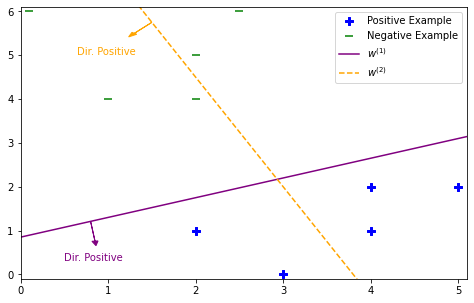

In [129]:
positive_data = np.array([
    [3, 0],
    [2, 1],
    [4, 1],
    [4, 2],
    [5, 2]
])

negative_data = np.array([
    [0.1, 6],
    [2.5, 6],
    [2, 5],
    [2, 4],
    [1, 4]
])

# Find min/max of data above (to be flexible)
min_x = min(np.min(positive_data[:, 0]), np.min(negative_data[:, 0]))
max_x = max(np.max(positive_data[:, 0]), np.max(negative_data[:, 0]))
min_y = min(np.min(positive_data[:, 1]), np.min(negative_data[:, 1]))
max_y = max(np.max(positive_data[:, 1]), np.max(negative_data[:, 1]))

# Make lines for classifier

def boundary1(xs):
    return 0.45 * xs + 0.85 

def boundary2(xs):
    return 9.5 - 2.5 * xs

xs = np.linspace(min_x - 0.5, max_x + 0.5, 100)
line_1 = boundary1(xs)
line_2 = boundary2(xs)

# Make plots
fig, ax = plt.subplots(1, figsize=(8, 5))

# Plot data
ax.scatter(positive_data[:, 0], positive_data[:, 1], marker="P", color="b", s=80, label="Positive Example")
ax.scatter(negative_data[:, 0], negative_data[:, 1], marker="_", color="g", s=80, label="Negative Example")

# Plot boundaries
ax.plot(xs, line_1, color="purple", label="$w^{(1)}$")
ax.plot(xs, line_2, color="orange", linestyle="--", label="$w^{(2)}$") 

# Plot indicators for positive direction (somewhat hardcoded for simplicty)
ax.arrow(0.8, boundary1(0.8), 0.05, -0.45, color="purple", head_width=0.07)
ax.annotate("Dir. Positive", xy=(0.5, 0.3), color="purple")

ax.arrow(1.5, boundary2(1.5), -0.2, -0.25, color="orange", head_width=0.07)
ax.annotate("Dir. Positive", xy=(0.65, 5), color="orange")

# Customize plot
ax.set_xlim((min_x - 0.1, max_x + 0.1))
ax.set_ylim((min_y - 0.1, max_y + 0.1))
ax.legend()

(-0.1, 5.1)

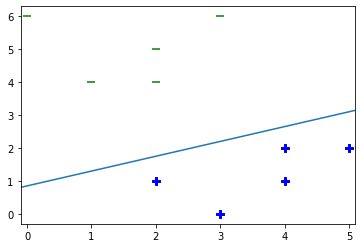

5